In [ ]:
import os

if "COLAB_GPU" in os.environ:
    print("[INFO] Running in Google Colab, installing requirements.")
    #!pip install -U torch # requires torch 2.1.1+ (for efficient sdpa implementation)
    !pip install PyMuPDF # for reading PDFs with Python
    !pip install tqdm # for progress bars
    !pip install sentence-transformers # for embedding models
    !pip install accelerate # for quantization model loading
    !pip install bitsandbytes # for quantizing models (less storage space)
    !pip install flash-attn --no-build-isolation # for faster attention mechanism = faster LLM inference

[INFO] Running in Google Colab, installing requirements.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing in

In [ ]:
import os
import requests

In [ ]:
path_pdf = "mybook.pdf"

if not os.path.exists(path_pdf):
    print(" [ERROR] File not found, Downloading it...")

    file_url = "https://ncert.nic.in/textbook/pdf/kehe103.pdf"

    filename = path_pdf

    reponse = requests.get(file_url)

    if reponse.status_code == 200:
        with open(filename, "wb") as file:
            file.write(reponse.content)
        print(f"The File has been downloaded as {filename} and ready to use ....:)")
    else:
        print(f"[Error] Failed to download the file, Status Code {response.status_code} ")

else:
    print("File already exists, Skipping the download...")

 [ERROR] File not found, Downloading it...
The File has been downloaded as mybook.pdf and ready to use ....:)


In [ ]:
import fitz
#from tqdm.auto import tqdm
from tqdm.notebook import tqdm_notebook as tqdm
def text_formatter(text):
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

def open_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_text = []

    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text)

        pages_and_text.append({"page_number" : page_number + 1,
                                "page_char_count" : len(text),
                                "page_word_count" : len(text.split(" ")),
                                "page_sentence_count" : len(text.split(". ")),
                                "page_token_count" : len(text)/4,  # Roughly one token = ~ 4 characters
                                "text" : text})
    return pages_and_text

pages_and_texts = open_read_pdf(path_pdf)

0it [00:00, ?it/s]

In [ ]:
pages_and_texts[:1]

[{'page_number': 1,
  'page_char_count': 1575,
  'page_word_count': 281,
  'page_sentence_count': 16,
  'page_token_count': 393.75,
  'text': 'Human Ecology and Family Sciences – Part I 28 3 Food, Nutrition,  Health and  Fitness 3.1 Introduction  The onset of adolescence brings with it many profound changes. The growth  rate speeds up dramatically. This growth spurt occurs due to the activity  of hormones that affect every organ of the body and this makes healthy  eating very important. The nutrient needs rise throughout childhood, peak  in adolescence and then level off or even diminish as the teenager becomes  an adult. The saying ‘‘You are what you eat” seems to be proven true. We  eat different kinds of food such as dal, chapatti, bread, rice, vegetables,  milk, lassi, etc. All these different kinds of food provide us with nutrients  to keep us healthy and active. It is important to know what food to eat in  order to stay healthy. The science of food and nutrients and their action 

In [ ]:
import random
random.sample(pages_and_texts, k = 2)

[{'page_number': 2,
  'page_char_count': 2617,
  'page_word_count': 444,
  'page_sentence_count': 25,
  'page_token_count': 654.25,
  'text': '29 Nutrition and health, in fact, are two sides of the same coin. They  are, therefore, inseparable. Health depends to a large extent on nutrition,  and nutrition depends on the food intake. So food, is the most important  single factor for health and fitness. Let us define and describe food, nutrition, health and fitness •  Food   can be defined as anything solid or liquid which when swallowed,  digested and assimilated in the body provides it with essential substances  called nutrients and keeps it well. It is the basic necessity of life. Food  supplies energy, enables growth and repair of tissues and organs. It  also protects the body from disease and regulates body functions. •  Nutrition is defined as the science of foods, nutrients and other  substances they contain; and of their actions within the body including  ingestion, digestion, abs

In [ ]:
import pandas as pd
df = pd.DataFrame(pages_and_texts)

In [ ]:
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text
0,1,1575,281,16,393.75,Human Ecology and Family Sciences – Part I 28 ...
1,2,2617,444,25,654.25,"29 Nutrition and health, in fact, are two side..."
2,3,314,60,1,78.50,Human Ecology and Family Sciences – Part I 30 ...
3,4,2813,467,23,703.25,31 4. Provides a safety margin for nutrients 5...
4,5,2081,371,20,520.25,Human Ecology and Family Sciences – Part I 32 ...


In [ ]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count
count,19.00,19.00,19.00,19.00,19.00
mean,10.00,1942.58,339.79,18.47,485.64
std,5.63,924.51,153.07,8.39,231.13
min,1.00,314.00,60.00,1.00,78.50
25%,5.50,1163.00,214.00,15.50,290.75
50%,10.00,2081.00,371.00,20.00,520.25
75%,14.50,2786.50,478.50,25.00,696.62
max,19.00,3016.00,519.00,29.00,754.00


In [ ]:
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")

In [ ]:
pages_and_texts[0]

{'page_number': 1,
 'page_char_count': 1575,
 'page_word_count': 281,
 'page_sentence_count': 16,
 'page_token_count': 393.75,
 'text': 'Human Ecology and Family Sciences – Part I 28 3 Food, Nutrition,  Health and  Fitness 3.1 Introduction  The onset of adolescence brings with it many profound changes. The growth  rate speeds up dramatically. This growth spurt occurs due to the activity  of hormones that affect every organ of the body and this makes healthy  eating very important. The nutrient needs rise throughout childhood, peak  in adolescence and then level off or even diminish as the teenager becomes  an adult. The saying ‘‘You are what you eat” seems to be proven true. We  eat different kinds of food such as dal, chapatti, bread, rice, vegetables,  milk, lassi, etc. All these different kinds of food provide us with nutrients  to keep us healthy and active. It is important to know what food to eat in  order to stay healthy. The science of food and nutrients and their action  on ou

In [ ]:
for x in tqdm(pages_and_texts):
    x["sentences"] = list(nlp(x["text"]).sents)
    x["sentences"] = [str(k) for k in x["sentences"]]
    x["page_sentence_count"] = len(x["sentences"])

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
pages_and_texts[0]

{'page_number': 1,
 'page_char_count': 1575,
 'page_word_count': 281,
 'page_sentence_count': 16,
 'page_token_count': 393.75,
 'text': 'Human Ecology and Family Sciences – Part I 28 3 Food, Nutrition,  Health and  Fitness 3.1 Introduction  The onset of adolescence brings with it many profound changes. The growth  rate speeds up dramatically. This growth spurt occurs due to the activity  of hormones that affect every organ of the body and this makes healthy  eating very important. The nutrient needs rise throughout childhood, peak  in adolescence and then level off or even diminish as the teenager becomes  an adult. The saying ‘‘You are what you eat” seems to be proven true. We  eat different kinds of food such as dal, chapatti, bread, rice, vegetables,  milk, lassi, etc. All these different kinds of food provide us with nutrients  to keep us healthy and active. It is important to know what food to eat in  order to stay healthy. The science of food and nutrients and their action  on ou

In [ ]:
df = pd.DataFrame(pages_and_texts)

In [ ]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count
count,19.00,19.00,19.00,19.00,19.00
mean,10.00,1942.58,339.79,19.32,485.64
std,5.63,924.51,153.07,8.58,231.13
min,1.00,314.00,60.00,1.00,78.50
25%,5.50,1163.00,214.00,15.00,290.75
50%,10.00,2081.00,371.00,21.00,520.25
75%,14.50,2786.50,478.50,26.00,696.62
max,19.00,3016.00,519.00,29.00,754.00


## Chunking the sentences

The concept to splitting larger group of text in to smaller chunks is called Chunking

In [ ]:
# Defining the chunk size

num_sentence_chunk_size = 10

#create a function to split list of texts recursizely into chunk size

def split_list(input_list: list[str],
               slice_size: int = num_sentence_chunk_size) -> list[list[str]]:

    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

In [ ]:
test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [ ]:
num_sentence_chunk_size = 10

for item in tqdm(pages_and_texts):
    item["sentences_chunks"] = split_list(item["sentences"] , slice_size = num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentences_chunks"])

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
random.sample(pages_and_texts, k = 1)

[{'page_number': 17,
  'page_char_count': 2683,
  'page_word_count': 455,
  'page_sentence_count': 26,
  'page_token_count': 670.75,
  'text': 'Human Ecology and Family Sciences – Part I 44 To understand anorexia nervosa let us take the example of Sonam.  She aspires to have a perfect body. She has been ignoring the advice of  her parents and teachers and almost stopped eating. She has become  obsessed with having a very thin body. Although her current weight is  normal, she feels pressured to be “ideally” thin like some actresses in  movies or models in magazines. She has a low self-esteem and remains  depressed, and this has resulted in her withdrawing from her family and  friends. She is unaware that she is undernourished and insists that she is  fat. She is a clear case of the eating disorder called anorexia nervosa. She  is unaware that drastic loss of weight can even lead to death. Bulimia is another type of eating disorder. Bulimia often begins in late  adolescence or early adul

In [ ]:
df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text,sentences,sentences_chunks,num_chunks
0,1,1575,281,16,393.75,Human Ecology and Family Sciences – Part I 28 ...,[Human Ecology and Family Sciences – Part I 28...,[[Human Ecology and Family Sciences – Part I 2...,2
1,2,2617,444,25,654.25,"29 Nutrition and health, in fact, are two side...","[29 Nutrition and health, in fact, are two sid...","[[29 Nutrition and health, in fact, are two si...",3
2,3,314,60,1,78.50,Human Ecology and Family Sciences – Part I 30 ...,[Human Ecology and Family Sciences – Part I 30...,[[Human Ecology and Family Sciences – Part I 3...,1
3,4,2813,467,24,703.25,31 4. Provides a safety margin for nutrients 5...,"[31 4., Provides a safety margin for nutrients...","[[31 4., Provides a safety margin for nutrient...",3
4,5,2081,371,20,520.25,Human Ecology and Family Sciences – Part I 32 ...,[Human Ecology and Family Sciences – Part I 32...,[[Human Ecology and Family Sciences – Part I 3...,2


In [ ]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,num_chunks
count,19.00,19.00,19.00,19.00,19.00,19.00
mean,10.00,1942.58,339.79,19.32,485.64,2.37
std,5.63,924.51,153.07,8.58,231.13,0.76
min,1.00,314.00,60.00,1.00,78.50,1.00
25%,5.50,1163.00,214.00,15.00,290.75,2.00
50%,10.00,2081.00,371.00,21.00,520.25,3.00
75%,14.50,2786.50,478.50,26.00,696.62,3.00
max,19.00,3016.00,519.00,29.00,754.00,3.00


# Making each chunk its own item.

In [ ]:
import re

pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentences_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        joined_sentence_chunk = " ".join(sentence_chunk).replace("  "," ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)


  0%|          | 0/19 [00:00<?, ?it/s]

45

In [ ]:
random.sample(pages_and_chunks, k = 2)

[{'page_number': 13,
  'sentence_chunk': 'Human Ecology and Family Sciences – Part I 40 3.7\t Modifying diet related behaviour As you have read in the chapter on ‘Self ’, adolescence is a time when an individual begins to question authority and tries to establish her/his status. Eating behaviour is one of the mediums through which individuality may be expressed by adolescents. Thus, rejection of routine home food (which may be healthy) and eating outside (not so healthy), sometimes in order to conform to peer preferences, is not uncommon in adolescence. It is easier for us to change lifestyle and diet patterns if we are convinced that we want to do so. What are the ways in which adolescents can modify their own behaviour? The next section tells us more about how to adopt healthy dietary practices. Limiting television viewing: Television viewing should be limited to about one or two hours each day (this includes playing video games or using the computer). Watching television does not us

In [ ]:
df = pd.DataFrame(pages_and_chunks)
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,1,Human Ecology and Family Sciences – Part I 28 ...,1084,186,271.00
1,1,"understand the term, balanced diet and apply t...",461,66,115.25
2,2,"29 Nutrition and health, in fact, are two side...",996,157,249.00
3,2,• Nutrients are the constituents in food that ...,1309,210,327.25
4,2,Recommended Dietary Allowances = Requirements ...,277,44,69.25


In [ ]:
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,45.00,45.00,45.00,45.00
mean,10.51,807.11,130.98,201.78
std,5.47,378.05,60.47,94.51
min,1.00,43.00,6.00,10.75
25%,6.00,543.00,88.00,135.75
50%,11.00,883.00,139.00,220.75
75%,15.00,1040.00,173.00,260.00
max,19.00,1497.00,241.00,374.25


## Filter Chunks for text of short chunks

In [ ]:
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(2).iterrows():
    print(f'chunk token count: {row[1]["chunk_token_count"]}") | {row[1]["sentence_chunk"]}')

chunk token count: 10.75") | Food, Nutrition, Health and Fitness 2024-25
chunk token count: 22.5") | Nutritive value of Indian foods. Hyderabad. National Institute of Nutrition, ICMR. 2024-25


In [ ]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient = "records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 1,
  'sentence_chunk': 'Human Ecology and Family Sciences – Part I 28 3 Food, Nutrition, Health and Fitness 3.1 Introduction The onset of adolescence brings with it many profound changes. The growth rate speeds up dramatically. This growth spurt occurs due to the activity of hormones that affect every organ of the body and this makes healthy eating very important. The nutrient needs rise throughout childhood, peak in adolescence and then level off or even diminish as the teenager becomes an adult. The saying ‘‘You are what you eat” seems to be proven true. We eat different kinds of food such as dal, chapatti, bread, rice, vegetables, milk, lassi, etc. All these different kinds of food provide us with nutrients to keep us healthy and active. It is important to know what food to eat in order to stay healthy. The science of food and nutrients and their action on our health is called Nutrition. Learning Objectives After completing this chapter the learner will be able to —

In [ ]:
random.sample(pages_and_chunks_over_min_token_len , k = 1)

[{'page_number': 19,
  'sentence_chunk': 'Do you think the diet is balanced? Use the following format to write your response. Meal/menu Inclusion of five food groups Comment on whether meal is balanced/not balanced 3. \t Interview members of your family such as your grandmother, mother or aunt to collect information about—   (a) \tfood taboos giving reasons why the taboos are followed. ( b)\t food practices during fasting and festivity from the region of India to which you belong. ( c)\t preparations during fasting. Tabulate the information as follows. Region Occasion (nature of fast) Preparation Nutrients present Give two inferences on the basis of the information tabulated. 2024-25',
  'chunk_char_count': 646,
  'chunk_word_count': 104,
  'chunk_token_count': 161.5}]

# Creating Embeddings for our text chunks

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2",
                                      device = "cpu")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = ["I am Krishnakant", "I am building a RAG system from scratch" , "I need a coffee break"]

embeddings = embedding_model.encode(sentences)
embeddings_dicts = dict(zip(sentences, embeddings))

for sentences, embeddings in embeddings_dicts.items():
    print(f"Sentences: {sentences} | Embeddings: {embeddings}")
    print("-"*50)


Sentences: I am Krishnakant | Embeddings: [ 6.48766160e-02 -4.92044119e-03 -3.26745980e-03  1.37478849e-02
  1.77866798e-02 -2.28168629e-02 -5.69472648e-02  6.88298140e-03
  2.05219314e-02  4.63037305e-02  2.45676525e-02 -5.65036526e-03
  2.07951926e-02 -9.74977016e-03  4.69870716e-02 -7.17391148e-02
  4.15566331e-03 -2.48167217e-02 -3.52369472e-02  1.44850882e-03
 -2.22468972e-02 -4.29387065e-03 -8.28094315e-03  1.93412937e-02
 -2.63551883e-02 -3.30415624e-03  4.74269651e-02  4.06654179e-03
 -2.37053167e-03  1.34590780e-02 -4.99588577e-03 -5.11369631e-02
  2.68809982e-02  5.61444499e-02  1.69413079e-06  2.85213497e-02
  2.71352176e-02 -1.93492565e-02 -4.24576290e-02 -4.51370142e-02
 -1.90598760e-02  3.34860422e-02  2.87579522e-02  6.61514187e-03
  8.08461662e-03  7.91779906e-02  1.94201227e-02  5.12910858e-02
  8.41688551e-03  4.59794700e-02 -8.13493971e-03 -3.77004705e-02
 -6.87049003e-03 -3.72925624e-02 -2.19510179e-02 -5.08351848e-02
 -2.78425533e-02  1.63675956e-02 -2.88607236e-02

In [ ]:
%time
embedding_model.to("cpu")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs


SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [ ]:
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/43 [00:00<?, ?it/s]

In [ ]:
"""text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[0]"""

'text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]\ntext_chunks[0]'

In [ ]:
"""text_chunks_embeddings = embedding_model.encode(text_chunks, batch_size = 32 , convert_to_tensor = True)
text_chunks_embeddings"""

'text_chunks_embeddings = embedding_model.encode(text_chunks, batch_size = 32 , convert_to_tensor = True)\ntext_chunks_embeddings'

# Saving embeddings to a file

In [ ]:
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
path = "text_chunks_and_embeddings.csv"
text_chunks_and_embeddings_df.to_csv(path, index = False)

In [ ]:
text_chunks_and_embeddings_df_load = pd.read_csv("text_chunks_and_embeddings.csv")
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,Human Ecology and Family Sciences – Part I 28 ...,1084,186,271.00,[ 3.87030207e-02 2.31444128e-02 -6.80696405e-...
1,1,"understand the term, balanced diet and apply t...",461,66,115.25,[ 6.43902346e-02 -1.74537133e-02 1.28182760e-...
2,2,"29 Nutrition and health, in fact, are two side...",996,157,249.00,[-1.60201569e-03 2.79643200e-02 9.70246550e-...
3,2,• Nutrients are the constituents in food that ...,1309,210,327.25,[ 3.66467983e-02 -5.77328466e-02 -2.75631528e-...
4,2,Recommended Dietary Allowances = Requirements ...,277,44,69.25,[ 1.81009453e-02 -1.65377967e-02 8.93488992e-...


# **RAG - Search and Answer**

In [ ]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embeddings_df = pd.read_csv("text_chunks_and_embeddings.csv")

text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep = " "))

#converting the embeddings into torch.tensors
embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].tolist() , axis = 0) , dtype = torch.float32 ).to(device)

pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient = "records" )
text_chunks_and_embeddings_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,1,Human Ecology and Family Sciences – Part I 28 ...,1084,186,271.00,"[0.0387030207, 0.0231444128, -0.00680696405, -..."
1,1,"understand the term, balanced diet and apply t...",461,66,115.25,"[0.0643902346, -0.0174537133, 0.012818276, -0...."
2,2,"29 Nutrition and health, in fact, are two side...",996,157,249.00,"[-0.00160201569, 0.02796432, 0.0097024655, -0...."
3,2,• Nutrients are the constituents in food that ...,1309,210,327.25,"[0.0366467983, -0.0577328466, -0.00275631528, ..."
4,2,Recommended Dietary Allowances = Requirements ...,277,44,69.25,"[0.0181009453, -0.0165377967, 0.00893488992, 0..."


In [ ]:
"""embeddings = text_chunks_and_embeddings_df["embedding"]
print(type(embeddings[0])) #<class 'numpy.ndarray'>
embeddings.head()"""

'embeddings = text_chunks_and_embeddings_df["embedding"]\nprint(type(embeddings[0])) #<class \'numpy.ndarray\'>\nembeddings.head()'

In [ ]:
""" embeddings = np.stack(text_chunks_and_embeddings_df["embedding"].tolist() , axis = 0)
 embeddings"""

' embeddings = np.stack(text_chunks_and_embeddings_df["embedding"].tolist() , axis = 0)\n embeddings'

In [ ]:
embeddings.shape

torch.Size([43, 768])

In [ ]:
#creating the embeddings model

from sentence_transformers import util, SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2",
                                      device = device)

In [ ]:
print(embedding_model)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)


In [ ]:
"""# dtypes of query_embeddings and embeddings
query_embedding.dtype , embeddings[0].dtype"""

'# dtypes of query_embeddings and embeddings\nquery_embedding.dtype , embeddings[0].dtype'

In [ ]:
query = "anorexia nervosa"
print(f"QUERY : {query}")

query_embedding = embedding_model.encode(query , convert_to_tensor = True).to(device)

from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a = query_embedding , b = embeddings)[0]
end_time = timer()

print(f"Time taken to process {embeddings.shape} : {end_time - start_time:.5f} seconds" , "\n")

top_results_dot_product = torch.topk(dot_scores , k = 5)
top_results_dot_product

QUERY : anorexia nervosa
Time taken to process torch.Size([43, 768]) : 0.00303 seconds 



torch.return_types.topk(
values=tensor([0.6235, 0.5605, 0.5402, 0.5028, 0.3463], device='cuda:0'),
indices=tensor([35, 36, 34, 24,  1], device='cuda:0'))

In [ ]:
pages_and_chunks[1]["sentence_chunk"]

'understand the term, balanced diet and apply the concept in planning and consuming diets. • understand the basis for defining the Recommended Dietary Allowances (RDAs) and the difference between Dietary Requirement and RDA. • understand the basis for classifications of foods into appropriate groups. • analyse the factors which influence adolescent food habits. • identify the causes, symptoms and nutritional interventions related to eating disorders. 2024-25'

In [ ]:
import textwrap

def print_wrapped( text , wrap_length = 80):
    print(textwrap.fill(text , wrap_length))


In [ ]:
query = "What are carbohydrates"
print(f"QUERY : {query}")

query_embedding = embedding_model.encode(query , convert_to_tensor = True).to(device)

from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a = query_embedding , b = embeddings)[0]
end_time = timer()

print(f"Time taken to process {embeddings.shape} : {end_time - start_time:.5f} seconds" , "\n")

top_results_dot_product = torch.topk(dot_scores , k = 1)

count = 0
for score, index in zip(top_results_dot_product[0] , top_results_dot_product[1]):
    count+=1
    print(f"Count : {count}")
    print(f"Score {score:.4f}")
    print_wrapped(f"Text : {pages_and_chunks[index]['sentence_chunk']}")
    print(f"Page : {pages_and_chunks[index]['page_number']}")
    print("-"*50 , "\n")



QUERY : What are carbohydrates
Time taken to process torch.Size([43, 768]) : 0.00019 seconds 

Count : 1
Score 0.4210
Text : Remember One gram of •    carbohydrate releases 4 Kcal. of energy •
protein releases 4 Kcal. of energy •    fat releases 9 Kcal. of energy In
planning balanced diets, food should be chosen from each group in sufficient
quantity. Cereals and pulses should be taken adequately, fruits and vegetables
liberally, animal foods moderately and oils and sugars sparingly. Now let us
look at the concept of the food guide pyramid. Food, Nutrition, Health and
Fitness 2024-25
Page : 8
-------------------------------------------------- 



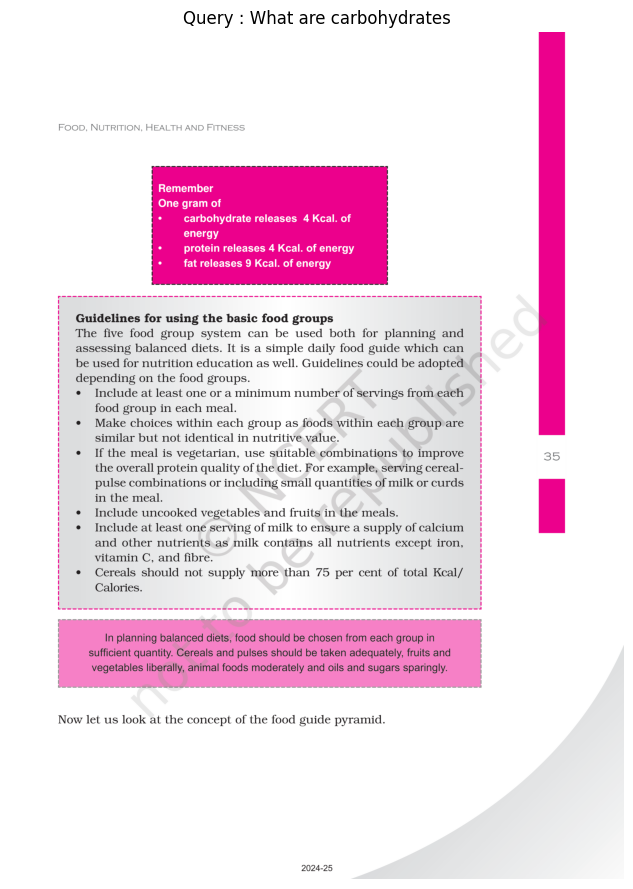

In [ ]:
import fitz

pdf_path = path_pdf
doc = fitz.open(pdf_path)
page = doc.load_page(pages_and_chunks[index]['page_number'] - 1)

img = page.get_pixmap(dpi = 300)
doc.close()

img_array = np.frombuffer(img.samples_mv , dtype = np.uint8).reshape((img.h , img.w , img.n))


import matplotlib.pyplot as plt

plt.figure(figsize = (13 , 11))
plt.title(f"Query : {query}")
plt.imshow(img_array)
plt.axis("off")
plt.show()

# Similarity Measures : "Dot Products" & "Cosine Similarity"

In [ ]:
embeddings[0].shape

torch.Size([768])

In [ ]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Takes a query, retrieves most relevant resources and prints them out in descending order.

    Note: Requires pages_and_chunks to be formatted in a specific way (see above for reference).
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    print(f"Query: {query}\n")
    print("Results:")
    # Loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        # Print the page number too so we can reference the textbook further and check the results
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [ ]:
uery = "symptoms of pellagra"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 43 embeddings: 0.00010 seconds.


(tensor([0.4210, 0.3845, 0.3668, 0.3567, 0.3562], device='cuda:0'),
 tensor([14,  2, 10,  3,  9], device='cuda:0'))

In [ ]:
# Print out the texts of the top scores
print_top_results_and_scores(query=query,
                             embeddings=embeddings)

[INFO] Time taken to get scores on 43 embeddings: 0.00008 seconds.
Query: What are carbohydrates

Results:
Score: 0.4210
Remember One gram of •   carbohydrate releases 4 Kcal. of energy •       protein
releases 4 Kcal. of energy •    fat releases 9 Kcal. of energy In planning
balanced diets, food should be chosen from each group in sufficient quantity.
Cereals and pulses should be taken adequately, fruits and vegetables liberally,
animal foods moderately and oils and sugars sparingly. Now let us look at the
concept of the food guide pyramid. Food, Nutrition, Health and Fitness 2024-25
Page number: 8


Score: 0.3845
29 Nutrition and health, in fact, are two sides of the same coin. They are,
therefore, inseparable. Health depends to a large extent on nutrition, and
nutrition depends on the food intake. So food, is the most important single
factor for health and fitness. Let us define and describe food, nutrition,
health and fitness • Food  can be defined as anything solid or liquid which

# Checking local GPU memory availability


In [ ]:
# Get GPU available memory
"""import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")"""

gpu_memory_gb = 12

In [ ]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 12 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [ ]:
from huggingface_hub import login

login(token=os.getenv("KEY_HUGGINGFACE_TOKEN"),)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create quantization config for smaller model loading (optional)
# Requires !pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires !pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation=attn_implementation) # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2b-it


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
llm_model


GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (norm): GemmaRMSNorm((2048,), 

In [ ]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

2506172416

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    See: https://discuss.pytorch.org/t/gpu-memory-that-model-uses/56822
    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012345344, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

# Generating text with our LLM


In [ ]:
input_text = "What are the macronutrients, and what roles do they play in the human body?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients, and what roles do they play in the human body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model



In [ ]:
%%time

# Tokenize the input text (turn it into numbers) and send it to GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

# Generate outputs passed on the tokenized input
# See generate docs: https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/text_generation#transformers.GenerationConfig
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) # define the maximum number of new tokens to create
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
         184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
            573,   3515,   2971, 235336,    107,    108,    106,   2516,    108]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
           573,   3515,   2971, 235336,    107,    108,    106,   2516,    108,
         21404, 235269,   1517, 235303, 235256,    476,  25497,    576,    573,
        186809, 184592,    578,   1024,  16065,    575,    573,   3515,   2971,
        235292,    109,    688,  12298,   1695, 184592,  66058,    109, 235287,
          5231, 156615,  56227,  66058,    108,   

In [ ]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
  

In [ ]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: What are the macronutrients, and what roles do they play in the human body?

Output text:
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
    * Trans fats can raise cholesterol levels and increase the r

In [ ]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [ ]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: How often should infants be breastfed?
[INFO] Time taken to get scores on 43 embeddings: 0.00017 seconds.


(tensor([0.2857, 0.2142, 0.2002, 0.1760, 0.1753], device='cuda:0'),
 tensor([38, 35, 13,  1, 20], device='cuda:0'))

# Augmenting our prompt with context items


In [ ]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    # Update base prompt with context items and query
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: What is the RDI for protein per day?
[INFO] Time taken to get scores on 43 embeddings: 0.00007 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bon

In [ ]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: What is the RDI for protein per day?
RAG answer:
<bos>The context does not provide information about the RDI for protein per day, so I cannot answer this question from the provided context.<eos>
CPU times: user 1.34 s, sys: 2.46 ms, total: 1.34 s
Wall time: 1.38 s


In [ ]:
def ask(query,
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU

    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context
answer, context_items = ask(query=query,
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print_wrapped(answer)
print(f"Context items:")
context_items

Query: What is the RDI for protein per day?
[INFO] Time taken to get scores on 43 embeddings: 0.00009 seconds.
Answer:

Context items:


[{'page_number': 18,
  'sentence_chunk': '45 Balanced diet   A diet which includes a variety of foods in adequate amounts and correct proportions to supply all essential nutrients which promote and preserve good health. Food group   A number of foods sharing common characteristics which are grouped together. Characteristic for grouping may be function, nutrient, or source. \t Lactation   The period when the mother nurses her infant. Physiological state   State when nutrient needs increase because of normal physiological events such as pregnancy and lactation. Recommended Dietary Allowances   Allowances of nutrients which cover the needs of practically all healthy individuals. These are not requirements for any individual but guidelines which tell us the amount of nutrients to be consumed daily. \x84 \x84 Review Questions 1. \t Differentiate between the terms RDA and requirement. 2.',
  'chunk_char_count': 844,
  'chunk_word_count': 136,
  'chunk_token_count': 211.0,
  'embedding': arra